<a href="https://colab.research.google.com/github/Vbritsx/analiseCancelamentos/blob/main/caseAnalistaDeNegociosVictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dados = pd.read_csv('/content/cancelamentos')

In [12]:
dados['data_entrada'] = pd.to_datetime(dados['data_entrada'])
dados['data_saida'] = pd.to_datetime(dados['data_saida'])

In [13]:
dados = dados.sort_values(by='data_saida')

In [14]:
cancelamentos_por_mes = dados.groupby(dados['data_saida'].dt.to_period('M')).size()

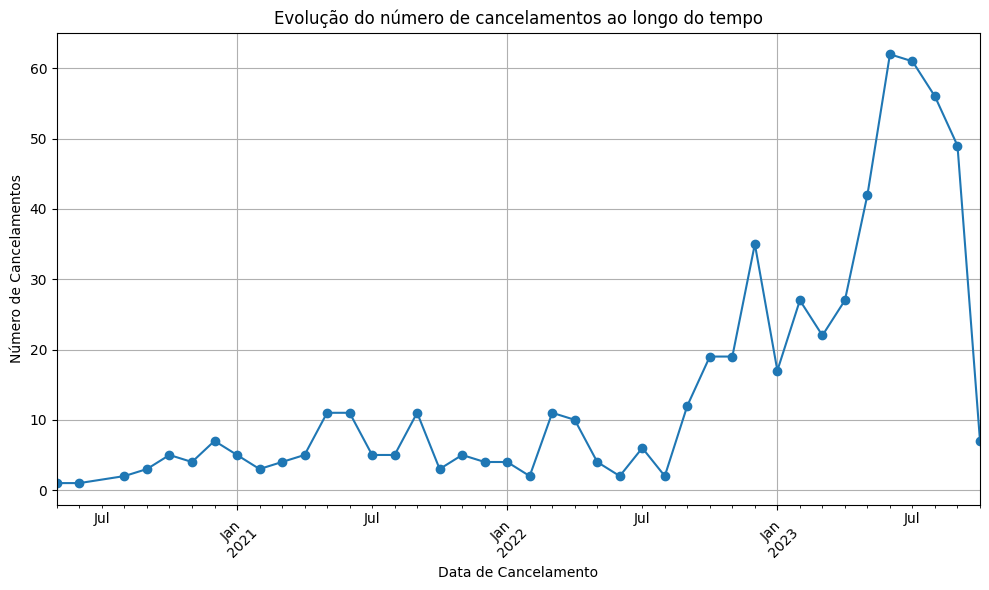

In [15]:
plt.figure(figsize=(10, 6))
cancelamentos_por_mes.plot(marker='o', linestyle='-')
plt.title('Evolução do número de cancelamentos ao longo do tempo')
plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
volume_cancelamentos_por_mes = dados.groupby(dados['data_saida'].dt.to_period('M')).size().cumsum()


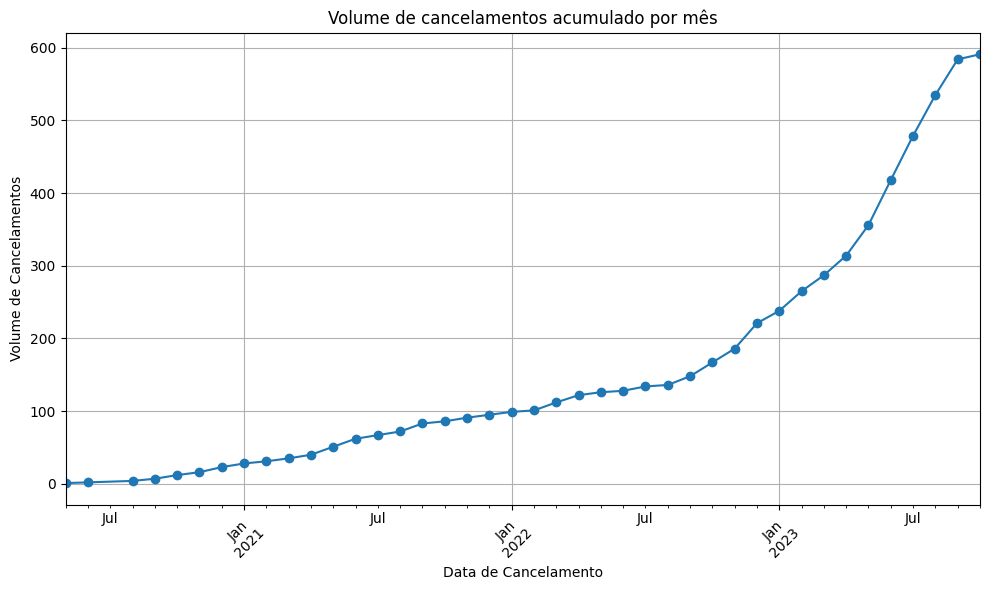

In [17]:
plt.figure(figsize=(10, 6))
volume_cancelamentos_por_mes.plot(marker='o', linestyle='-')
plt.title('Volume de cancelamentos acumulado por mês')
plt.xlabel('Data de Cancelamento')
plt.ylabel('Volume de Cancelamentos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
total_clientes_entrada_por_ano = dados.groupby(dados['data_entrada'].dt.year)['id_cliente'].nunique()
total_clientes_saida_por_ano = dados.groupby(dados['data_saida'].dt.year)['id_cliente'].nunique()

In [22]:
porcentagem_churn_por_ano = (total_clientes_saida_por_ano / total_clientes_entrada_por_ano) * 100

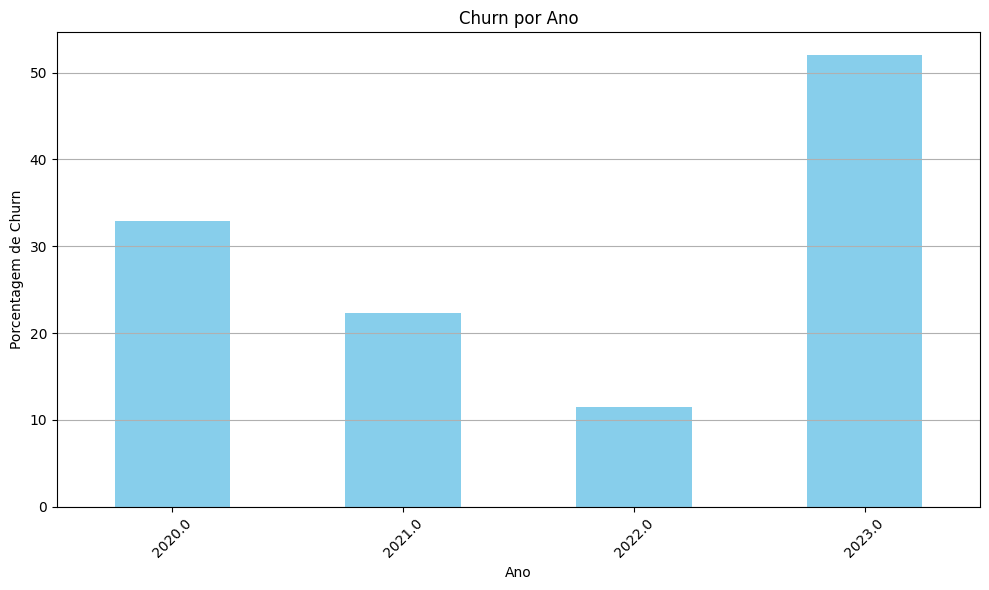

In [24]:
plt.figure(figsize=(10, 6))
porcentagem_churn_por_ano.plot(kind='bar', color='skyblue')
plt.title('Churn por Ano')
plt.xlabel('Ano')
plt.ylabel('Porcentagem de Churn')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()